In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importing the required data (all phospho data with tissue annotation, summarised on the protein level. The tissue is indicated by binary columns.

In [2]:
data_protein_STY = pd.read_csv("protein_data", sep="\t") #all data summarised on the protein level
data_protein_STY

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,Q9Y6X4,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
5851,Q9Y6X8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5852,Q9Y6X9,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,6
5853,Q9Y6Y0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,5


In [3]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

All data seen in two tissues is selected. Instead of large binary columns, two columns are added, specifying the number of tissues protein X is seen in.

In [4]:
data_protein_two_tissues = data_protein_STY[data_protein_STY["Total"]==2]
list_tissues_2_tissues = ['Adipose tissue', 'B-cells', 'Blood', 'Bone', 'Brain',
       'Breast', 'Cerebrospinal fluid', 'Cervix', 'Colon', 'Dental plaque',
       'Esophagus', 'Eye', 'Follicular fluid', 'Heart', 'Hela', 'Kidney',
       'Liver', 'Lung', 'Lymph node', 'Menstrual fluid', 'Monocytes',
       'Nasal polyps', 'NK-cells', 'Ovary', 'Pancreas', 'Palatine tonsils',
       'Parotid gland', 'PBMC', 'Peritoneal dialysis fluid', 'Placenta',
       'Skeletal muscle', 'Skin', 'Small intestine', 'Synovial tissue',
       'T-cells', 'Testis', 'Tooth', 'Umbilical cord', 'Ureter',
       'Urinary bladder', 'Urine'] # not all tissues have proteins expressed in two tissues -> new list
data_protein_two_tissues["tissue 1"] = 0
data_protein_two_tissues["tissue 2"] = 0

for tissue in list_tissues_2_tissues:
    data_protein_two_tissues.loc[((data_protein_two_tissues[tissue]==1)&(data_protein_two_tissues["tissue 1"]!=0)),
                                 "tissue 2"]=tissue
    data_protein_two_tissues.loc[((data_protein_two_tissues[tissue]==1)&(data_protein_two_tissues["tissue 1"]==0)),
                                 "tissue 1"]=tissue
data_protein_two_tissues.head()

C:\Users\hannedvo\AppData\Local\Temp\107/ipykernel_35032/1309673057.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_protein_two_tissues["tissue 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\107/ipykernel_35032/1309673057.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_protein_two_tissues["tissue 2"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total,tissue 1,tissue 2
7,A0A0C4DH36,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,Blood,Lung
18,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Blood,Colon
29,A1L390,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Colon,Lymph node
40,A3KN83,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Colon,Lymph node
43,A4UGR9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Colon,Skeletal muscle


In [5]:
print(data_protein_two_tissues.shape[0])
data_protein_two_tissues.head()

965


,ACC_ID,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,...,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total,tissue 1,tissue 2
7,A0A0C4DH36,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,Blood,Lung
18,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Blood,Colon
29,A1L390,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Colon,Lymph node
40,A3KN83,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Colon,Lymph node
43,A4UGR9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,Colon,Skeletal muscle


We now look per combination of tissues, how many proteins there are

In [6]:
two_tissues_counts = data_protein_two_tissues.groupby(["tissue 1", "tissue 2"], as_index=False)["ACC_ID"].count()
print(two_tissues_counts.shape[0])
two_tissues_counts.sort_values(by=["ACC_ID"], ascending=False).head(30)

96


,tissue 1,tissue 2,ACC_ID
35,Colon,Lymph node,191
4,Blood,Colon,172
9,Blood,Lymph node,95
34,Colon,Lung,86
8,Blood,Lung,35
58,Lung,Lymph node,34
38,Colon,Placenta,23
79,PBMC,Skin,21
68,Lymph node,PBMC,21
71,Lymph node,Testis,16


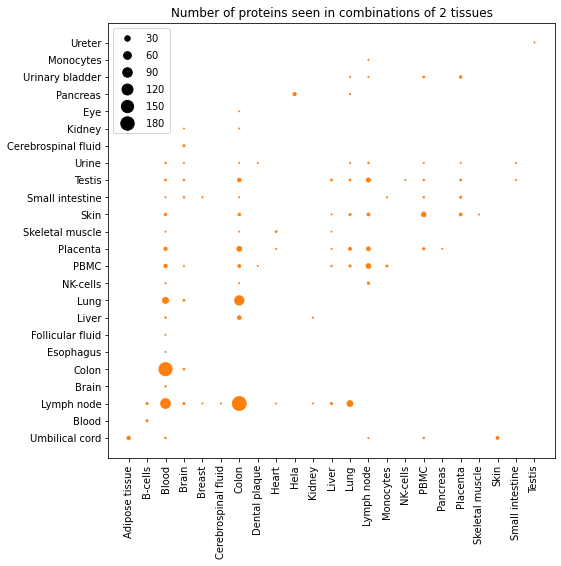

In [8]:
plt.figure(figsize=(8,8))
sc = plt.scatter(x=two_tissues_counts["tissue 1"], y=two_tissues_counts["tissue 2"], s=two_tissues_counts["ACC_ID"], color="tab:orange")
#s indicator demonstrated the size of the dot, based on the number of proteins seen. If too small, this can be multiplied by a constant (*7, see below), but I haven't found how to update the legend accordingly
#colour is chosen because tissue aspecific phosphorylated proteins/sites are always shown in organge in my thesis
plt.xticks(rotation=90)
plt.title("Number of proteins seen in combinations of 2 tissues")
plt.legend(*sc.legend_elements("sizes", num=6)) #adding the legend. Every number that can be divided by 6, is shown, for sizs. Can also do this for shapes, for example
#plt.savefig("WP1 proteins_two_tissues.png", format="png", bbox_inches="tight")
plt.show()

In [9]:
STY_non_t_spec_prot = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
STY_t_spec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")

In [10]:
STY_nontspecprot_tspecsites = pd.merge(STY_non_t_spec_prot, STY_t_spec_sites, how="inner", on="ACC_ID", suffixes=["_protein", "_site"])

In [11]:
print(STY_nontspecprot_tspecsites["ACC_ID"].nunique())
print(STY_nontspecprot_tspecsites.shape[0]) #compared to 14019 tissue-specific sites, a lot
STY_nontspecprot_tspecsites.head()

1596
4989


,ACC_ID,Adipose tissue_protein,B-cells_protein,Blood_protein,Bone_protein,Brain_protein,Breast_protein,Cerebrospinal fluid_protein,Cervix_protein,Colon_protein,...,Small intestine_site,Synovial tissue_site,T-cells_site,Testis_site,Tooth_site,Umbilical cord_site,Ureter_site,Urinary bladder_site,Urine_site,Total_site
0,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,A0M8Q6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
STY_nontspecprot_tspecsites["tissue_site"]=0 

for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites[tissue]==1, "tissue_site"]=tissue.split("_")[0]

In [13]:
STY_tspecsites_protein_tissue = STY_nontspecprot_tspecsites.groupby(["tissue_site", "ACC_ID"], as_index=False)["UP_POS"].count()
STY_tspecsites_protein_tissue

,tissue_site,ACC_ID,UP_POS
0,B-cells,P11836,1
1,B-cells,P12259,1
2,B-cells,Q4LE39,1
3,B-cells,Q7Z5R6,1
4,B-cells,Q9H165,1
...,...,...,...
2843,Urine,Q9H7P6,1
2844,Urine,Q9NZH0,6
2845,Urine,Q9UBP4,1
2846,Urine,Q9UP65,1


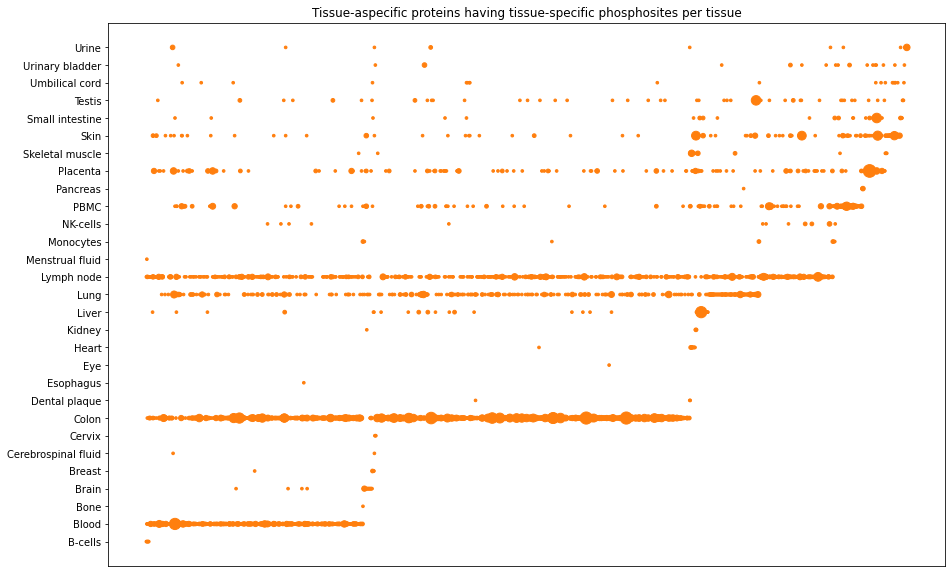

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(x=STY_tspecsites_protein_tissue["ACC_ID"], y=STY_tspecsites_protein_tissue["tissue_site"], s=STY_tspecsites_protein_tissue["UP_POS"]*7, color="tab:orange")
plt.xticks([],[])
plt.title("Tissue-aspecific proteins having tissue-specific phosphosites per tissue")
plt.show()

In [15]:
STY_general_prot = pd.read_csv("1.1 general P proteins", sep="\t")

In [16]:
STY_generalprot_tspecsites = pd.merge(STY_general_prot, STY_t_spec_sites, how="inner", on="ACC_ID", suffixes=["_protein", "_site"])
print(STY_generalprot_tspecsites["ACC_ID"].nunique())
print(STY_generalprot_tspecsites.shape[0])
STY_generalprot_tspecsites.head()

1352
6236


,ACC_ID,Adipose tissue_protein,B-cells_protein,Blood_protein,Bone_protein,Brain_protein,Breast_protein,Cerebrospinal fluid_protein,Cervix_protein,Colon_protein,...,Small intestine_site,Synovial tissue_site,T-cells_site,Testis_site,Tooth_site,Umbilical cord_site,Ureter_site,Urinary bladder_site,Urine_site,Total_site
0,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,A0JNW5,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,A0JNW5,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
STY_generalprot_tspecsites["tissue_site"] = 0
for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites[tissue]==1, "tissue_site"]=tissue.split("_")[0]

In [18]:
genprot_tspecsites_nrsites = STY_generalprot_tspecsites.groupby(["tissue_site", "ACC_ID"], as_index=False)["UP_POS"].count()

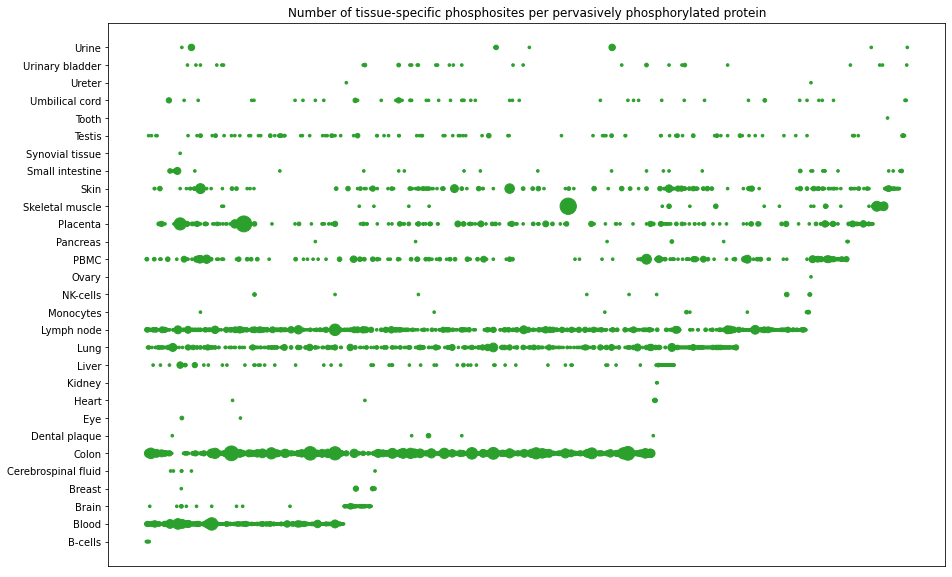

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(x=genprot_tspecsites_nrsites["ACC_ID"], y=genprot_tspecsites_nrsites["tissue_site"], s=genprot_tspecsites_nrsites["UP_POS"]*7, color="tab:green")
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per pervasively phosphorylated protein")
plt.show()

Combining pervasively phosphorylated proteins with tissue aspecific phosphorylated proteins.

In [26]:
STY_nontspecprot_tspecsites["Type"] = "tissue aspecific phosphorylated protein"
STY_generalprot_tspecsites["Type"] = "pervasively phosphorylated protein"
STY_nonspeccomb = pd.merge(STY_nontspecprot_tspecsites, STY_generalprot_tspecsites, how="outer")
STY_nonspeccomb.sort_values(by="ACC_ID", inplace=True, ignore_index=True)
STY_nonspeccomb.head()

,ACC_ID,Adipose tissue_protein,B-cells_protein,Blood_protein,Bone_protein,Brain_protein,Breast_protein,Cerebrospinal fluid_protein,Cervix_protein,Colon_protein,...,T-cells_site,Testis_site,Tooth_site,Umbilical cord_site,Ureter_site,Urinary bladder_site,Urine_site,Total_site,tissue_site,Type
0,A0AVK6,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,Colon,tissue aspecific phosphorylated protein
1,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,Colon,pervasively phosphorylated protein
2,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,Colon,pervasively phosphorylated protein
3,A0FGR8,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,Colon,pervasively phosphorylated protein
4,A0JLT2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,Blood,tissue aspecific phosphorylated protein


In [28]:
palette2 = {"pervasively phosphorylated protein": "darkseagreen", "tissue aspecific phosphorylated protein":"peachpuff"}
palette = {"pervasively phosphorylated protein": "tab:green", "tissue aspecific phosphorylated protein": "tab:orange"}

In [29]:
STY_nonspeccomb_tissue = STY_nonspeccomb.groupby(["tissue_site", "ACC_ID"], as_index=False).agg(
    {"UP_POS": "count", "Type": "first"})

In [30]:
STY_nonspeccomb_tissue["UP_POS_log"] = np.log10(STY_nonspeccomb_tissue["UP_POS"])
STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["UP_POS_log"]!=0]

,tissue_site,ACC_ID,UP_POS,Type,UP_POS_log
16,Blood,A6NC98,4,tissue aspecific phosphorylated protein,0.602060
18,Blood,A8CG34,2,tissue aspecific phosphorylated protein,0.301030
24,Blood,O00571,2,tissue aspecific phosphorylated protein,0.301030
25,Blood,O14492,2,tissue aspecific phosphorylated protein,0.301030
26,Blood,O14497,4,pervasively phosphorylated protein,0.602060
...,...,...,...,...,...
5872,Urine,P16112,2,tissue aspecific phosphorylated protein,0.301030
5873,Urine,Q08380,2,tissue aspecific phosphorylated protein,0.301030
5875,Urine,Q12929,3,pervasively phosphorylated protein,0.477121
5879,Urine,Q9NQ84,6,pervasively phosphorylated protein,0.778151


Dots on the plot below indicate individal proteins. As there are to many proteins, they overlap.

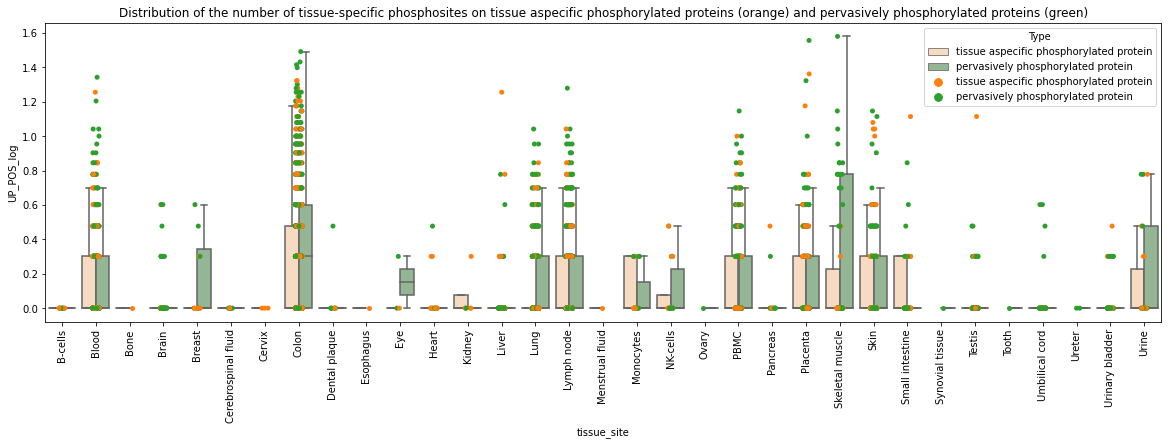

In [35]:
plt.figure(figsize=(20,5.5))
sns.boxplot(y="UP_POS_log", x="tissue_site", data=STY_nonspeccomb_tissue, hue="Type", palette = palette2, width=0.8, showfliers=False)
sns.stripplot(y = "UP_POS_log", x="tissue_site", data=STY_nonspeccomb_tissue, jitter=True, color="black", hue="Type", palette=palette)
plt.title("Distribution of the number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (orange) and pervasively phosphorylated proteins (green)")
plt.xticks(rotation=90)
#plt.savefig("WP1 tissue-specific phosphosites on non-tissue-specific phosphorylated proteins_boxplot.png", format="png", bbox_inches="tight")
plt.show()

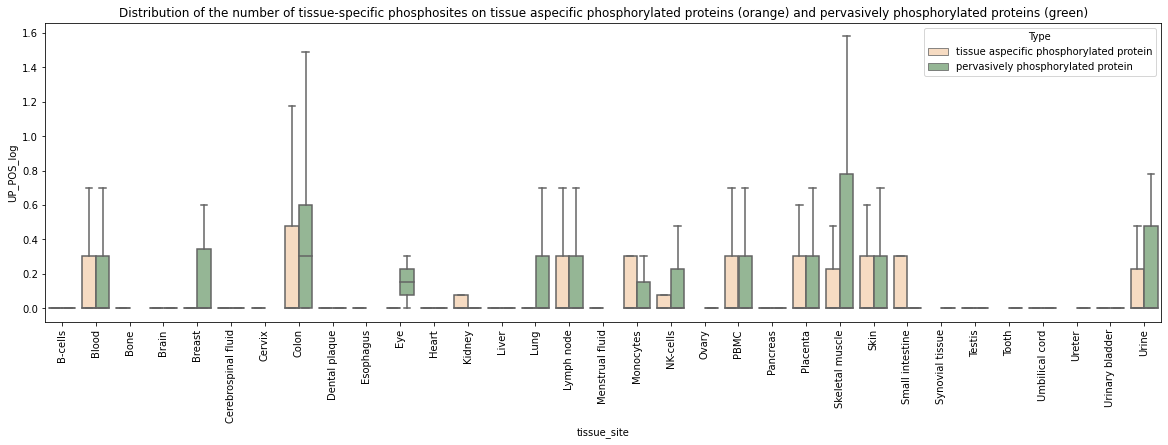

In [36]:
plt.figure(figsize=(20,5.5))
sns.boxplot(y="UP_POS_log", x="tissue_site", data=STY_nonspeccomb_tissue, hue="Type", palette = palette2, width=0.8, showfliers=False)
#sns.stripplot(y = "UP_POS", x="tissue_site", data=STY_nonspeccomb_tissue, jitter=True, color="black", hue="Type", palette=palette)
plt.title("Distribution of the number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (orange) and pervasively phosphorylated proteins (green)")
plt.xticks(rotation=90)
#plt.savefig("WP1 tissue-specific phosphosites on non-tissue-specific phosphorylated proteins_boxplot.png", format="png", bbox_inches="tight")
plt.show()

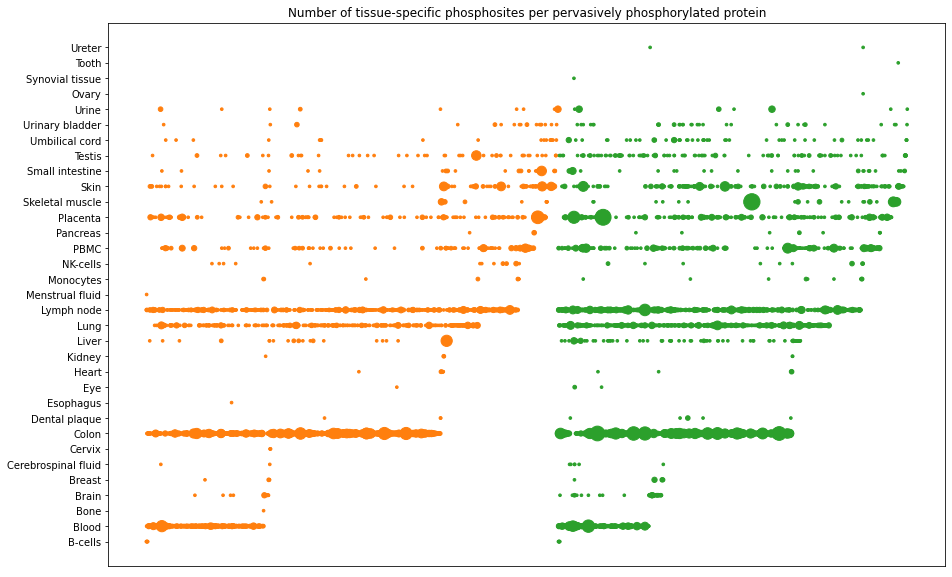

In [37]:
plt.figure(figsize=(15,10))
plt.scatter(x=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="tissue aspecific phosphorylated protein"]["ACC_ID"], y=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="tissue aspecific phosphorylated protein"]["tissue_site"], s=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="tissue aspecific phosphorylated protein"]["UP_POS"]*7, c=["tab:orange"])
plt.scatter(x=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="pervasively phosphorylated protein"]["ACC_ID"], y=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="pervasively phosphorylated protein"]["tissue_site"], s=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="pervasively phosphorylated protein"]["UP_POS"]*7, c=["tab:green"])
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per pervasively phosphorylated protein")
plt.show()

In [39]:
list_colour = STY_nonspeccomb_tissue["Type"].replace({"tissue aspecific phosphorylated protein": 0, "pervasively phosphorylated protein": 1}).tolist()
color = ["tab:orange" if l == 0 else "tab:green" for l in list_colour]

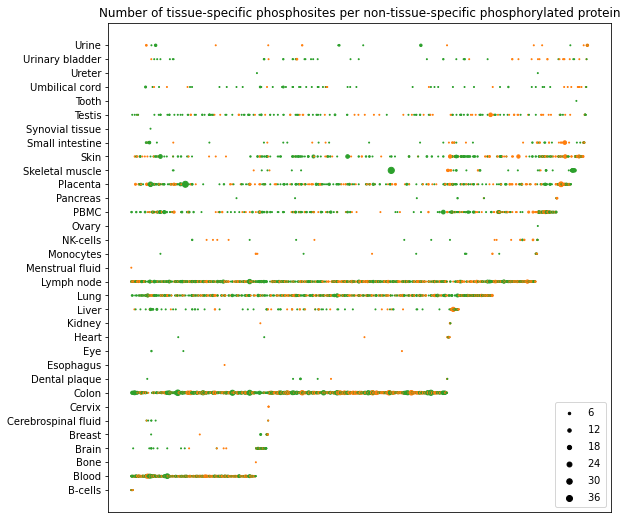

In [40]:
plt.figure(figsize=(9,9))
sc = plt.scatter(x=STY_nonspeccomb_tissue["ACC_ID"], y=STY_nonspeccomb_tissue["tissue_site"], s=STY_nonspeccomb_tissue["UP_POS"], c=color)
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per non-tissue-specific phosphorylated protein")
legend2 = plt.legend(*sc.legend_elements("sizes", num=6), loc="lower right")

#plt.savefig("WP1 tissue-specific phosphosites on non-tissue-specific phosphorylated proteins.png", format="png", bbox_inches="tight")
plt.show()

If you think the dots to small, you can ask the size to be the number of the column you specified, multiplied by a constant. (10 in the plot below). But the legend will show the number multiplied by the constant, in this case 10. Despite the data shown in these 2 plots (the one directly above and the one beneath) being the same, the legend is very different (multiplied by the constant specified by the user).
Created with help from this post: https://stackoverflow.com/questions/24164797/creating-a-matplotlib-scatter-legend-size-related?msclkid=8fa35d80d14411ecbb411fa04c4da798

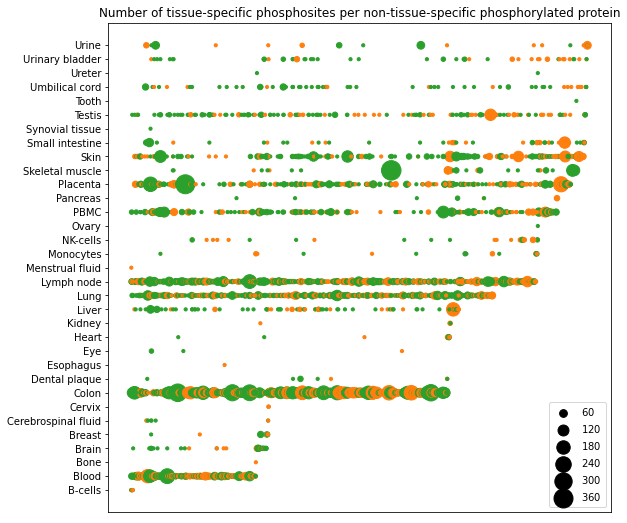

In [44]:
plt.figure(figsize=(9,9))
sc = plt.scatter(x=STY_nonspeccomb_tissue["ACC_ID"], y=STY_nonspeccomb_tissue["tissue_site"], s=STY_nonspeccomb_tissue["UP_POS"]*10, c=color)
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per non-tissue-specific phosphorylated protein")
legend2 = plt.legend(*sc.legend_elements("sizes", num=6), loc="lower right")

#plt.savefig("WP1 tissue-specific phosphosites on non-tissue-specific phosphorylated proteins.png", format="png", bbox_inches="tight")
plt.show()